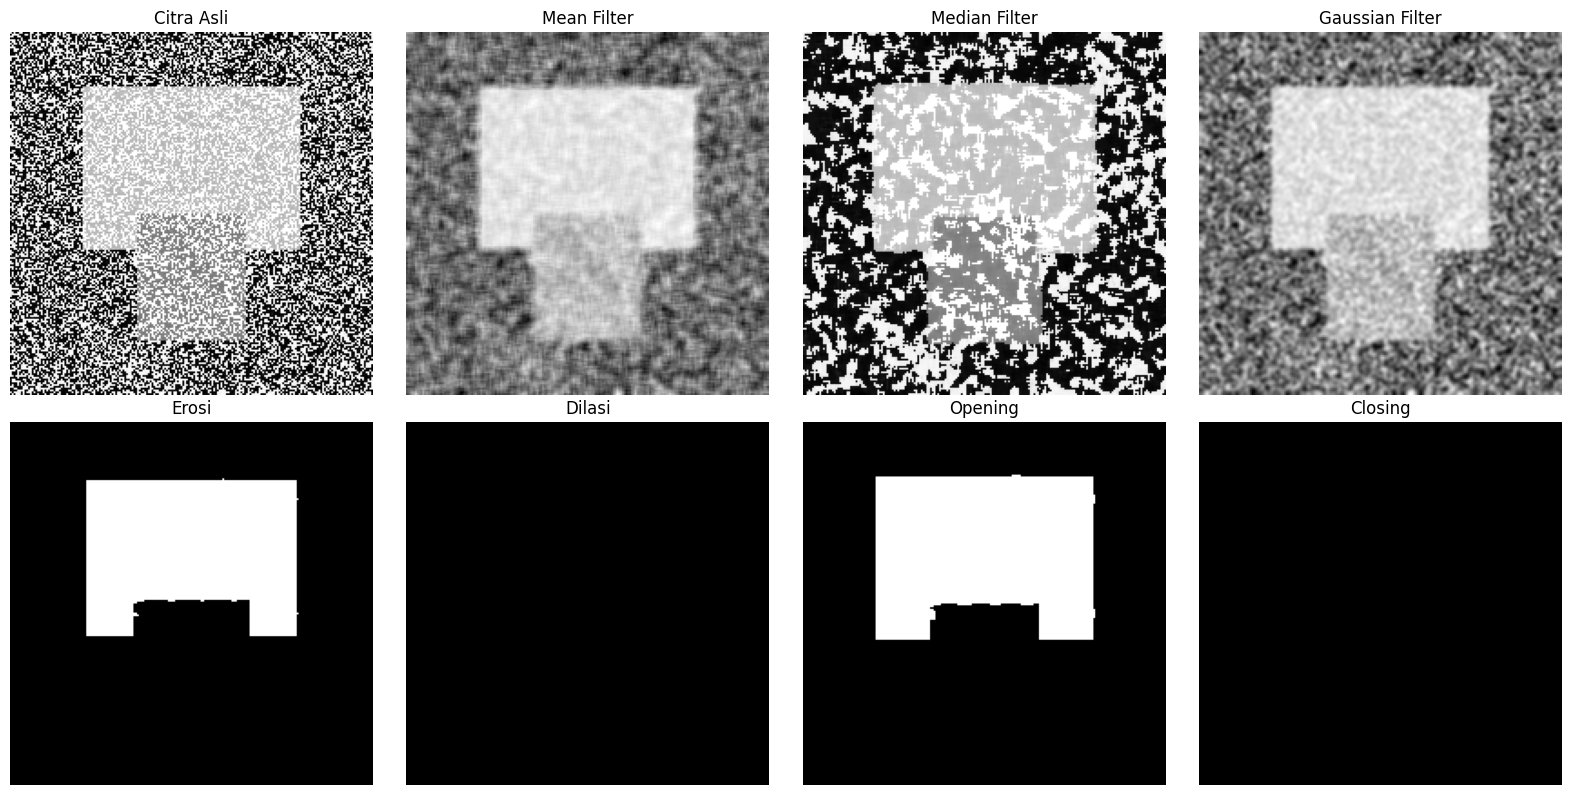

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Membuat Citra Dummy ---
def create_dummy_image(size=(200, 200)):
    """Membuat citra grayscale dengan dua area intensitas dan sedikit noise."""
    img = np.zeros(size, dtype=np.uint8)
    img[30:120, 40:160] = 180   # area terang
    img[100:170, 70:130] = 120  # area abu-abu
    noise = np.random.normal(0, 10, size).astype(np.uint8)
    img = cv2.add(img, noise)
    return img

image = create_dummy_image()

# --- 2. Filter Spasial ---
mean = cv2.blur(image, (5,5))
median = cv2.medianBlur(image, 5)
gaussian = cv2.GaussianBlur(image, (5,5), 0)

# --- 3. Binarisasi untuk Operasi Morfologi ---
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(binary, kernel, iterations=1)
dilation = cv2.dilate(binary, kernel, iterations=1)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# --- 4. Visualisasi ---
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

titles = [
    "Citra Asli", "Mean Filter", "Median Filter", "Gaussian Filter",
    "Erosi", "Dilasi", "Opening", "Closing"
]
images = [image, mean, median, gaussian, erosion, dilation, opening, closing]

for i in range(8):
    axes[i//4, i%4].imshow(images[i], cmap='gray')
    axes[i//4, i%4].set_title(titles[i])
    axes[i//4, i%4].axis('off')

plt.tight_layout()
plt.show()
